### 📦 Import Libraries
- Import NumPy for numerical operations and Matplotlib for visualization.
- These are essential for building the neural network and plotting results.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 📊 Generate Non-linear Synthetic Data
- Creates a dataset of 3 input features and a non-linear target using a quadratic function.
- Helps simulate a real-world non-linear regression problem for the neural network.


In [2]:
np.random.seed(42)

def generate_data(n_samples=200):
    X = np.random.rand(n_samples, 3)
    y = X[:, 0]**2 + X[:, 1]**2 + X[:, 2]**2  # Non-linear function
    return X, y.reshape(-1, 1)

X, y = generate_data()

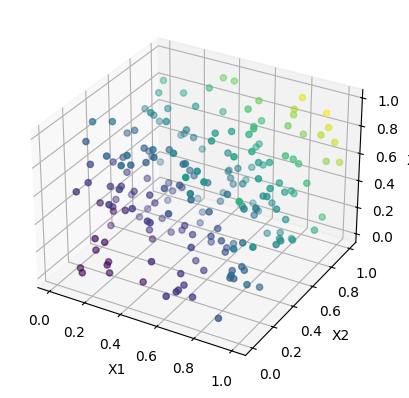

In [3]:
# Visualize the data (optional)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

###  Define Activation Functions
- Implements ReLU (non-linear) and linear (identity) activation functions.
- Also includes derivatives for backpropagation.


In [4]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def linear(x):
    return x

def linear_derivative(x):
    return np.ones_like(x)

###  Initialize Neural Network Parameters
- Sets up a 3-layer neural network: 2 hidden layers + 1 output layer.
- Randomly initializes weights and biases for all layers using small values.


In [5]:
input_size = 3
hidden1_size = 8
hidden2_size = 6
output_size = 1

W1 = np.random.randn(input_size, hidden1_size) * 0.1
b1 = np.zeros((1, hidden1_size))

W2 = np.random.randn(hidden1_size, hidden2_size) * 0.1
b2 = np.zeros((1, hidden2_size))

W3 = np.random.randn(hidden2_size, output_size) * 0.1
b3 = np.zeros((1, output_size))

###  Training the 3-Layer Neural Network
- Implements forward and backward passes using ReLU and linear activations.
- Uses manual backpropagation and chain rule to compute gradients and update weights.


In [14]:
learning_rate = 0.01
epochs = 500
losses = []

for epoch in range(epochs):
    # ---- Forward Pass ----
    z1 = X @ W1 + b1
    a1 = relu(z1)

    z2 = a1 @ W2 + b2
    a2 = relu(z2)

    z3 = a2 @ W3 + b3
    y_pred = linear(z3)

    # ---- Compute Loss (MSE) ----
    loss = np.mean((y_pred - y)**2)
    losses.append(loss)

    # ---- Backward Pass ----
    dL_dy = 2 * (y_pred - y) / y.shape[0]

    dL_dz3 = dL_dy * linear_derivative(z3)
    dL_dW3 = a2.T @ dL_dz3
    dL_db3 = np.sum(dL_dz3, axis=0, keepdims=True)

    dL_da2 = dL_dz3 @ W3.T
    dL_dz2 = dL_da2 * relu_derivative(z2)
    dL_dW2 = a1.T @ dL_dz2
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)

    dL_da1 = dL_dz2 @ W2.T
    dL_dz1 = dL_da1 * relu_derivative(z1)
    dL_dW1 = X.T @ dL_dz1
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    # ---- Update Weights ----
    W3 -= learning_rate * dL_dW3
    b3 -= learning_rate * dL_db3

    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2

    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1

    # ---- Print ----
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.6f}")

Epoch 0: Loss = 0.313458
Epoch 50: Loss = 0.313423
Epoch 100: Loss = 0.313387
Epoch 150: Loss = 0.313348
Epoch 200: Loss = 0.313307
Epoch 250: Loss = 0.313263
Epoch 300: Loss = 0.313217
Epoch 350: Loss = 0.313167
Epoch 400: Loss = 0.313114
Epoch 450: Loss = 0.313056


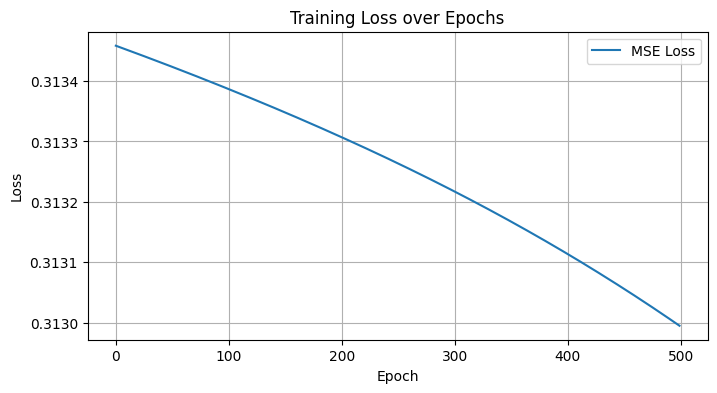

In [15]:
# ==== Plot Training Loss ====
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(losses, label='MSE Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.legend()
plt.show()


###  Compare Predictions with Actual Outputs
- Displays first 5 predicted values vs true target values.
- Useful to get a quick look at model accuracy after training.


In [16]:
# ==== Show Sample Predictions ====
print("Sample Predictions vs Actual (first 5 examples):")
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.4f} \t Actual: {y[i][0]:.4f}")


Sample Predictions vs Actual (first 5 examples):
Predicted: 1.0257 	 Actual: 1.5800
Predicted: 1.0259 	 Actual: 0.4071
Predicted: 1.0244 	 Actual: 1.1150
Predicted: 1.0274 	 Actual: 1.4425
Predicted: 1.0266 	 Actual: 0.7711


###  Visualize Actual vs Predicted Outputs in 3D
- 3D scatter plots show the target vs predicted values for all samples.
- Visually confirms how well the model fits the non-linear function.


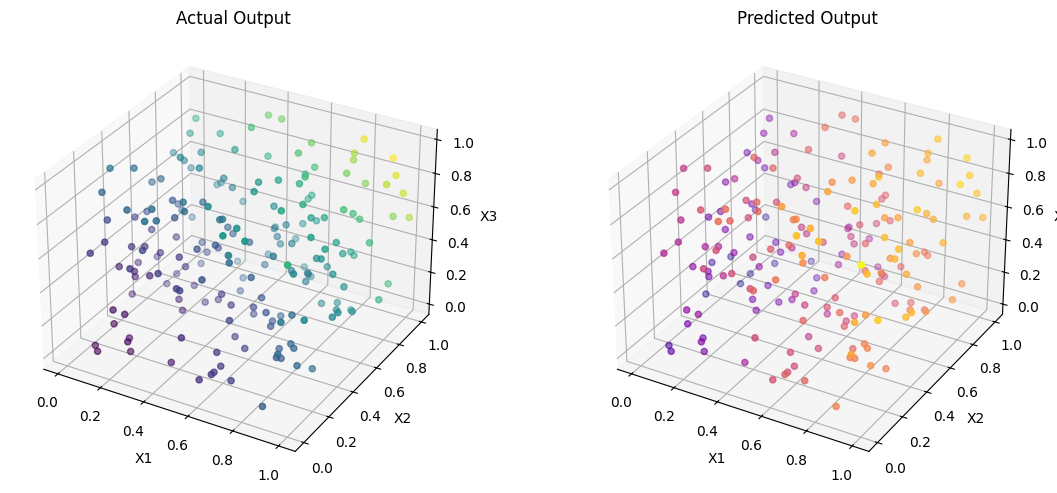

In [17]:
# ==== 3D Visualization of Predicted vs Actual ====
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 5))

# Actual
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.ravel(), cmap='viridis')
ax1.set_title("Actual Output")
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("X3")

# Predicted
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred.ravel(), cmap='plasma')
ax2.set_title("Predicted Output")
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_zlabel("X3")

plt.tight_layout()
plt.show()
